# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()
import pandas as pd

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [3]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.76111958 2.19355611 2.80450241 2.64476522 2.7951828  2.44009833
 2.9869906  2.75002339 2.59990277 2.52985297]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

(array([118.,  78.,  85.,  96.,  99., 103.,  98., 102., 104., 117.]),
 array([10.01564949, 15.01392161, 20.01219372, 25.01046584, 30.00873796,
        35.00701008, 40.00528219, 45.00355431, 50.00182643, 55.00009855,
        59.99837066]),
 <a list of 10 Patch objects>)

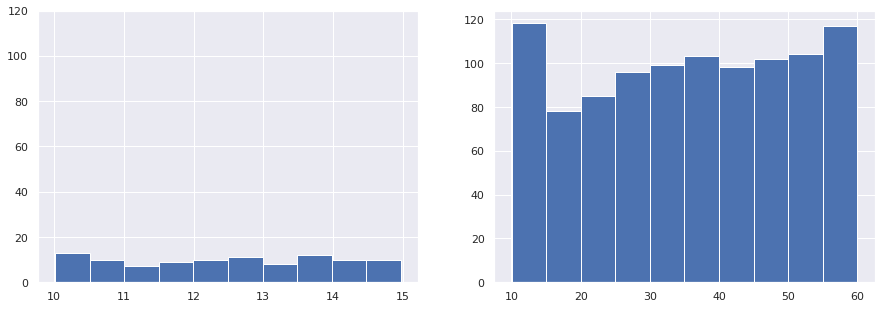

In [40]:
# your code here
x = uniform.rvs(size=100)
a = 10
b = 15
randoms  = a + (b-a)*x

x1 = uniform.rvs(size=1000)
a1 = 10
b1 = 60
randoms1  = a1 + (b1-a1)*x1

fig ,ax = plt.subplots(1,2,figsize=(15,5))

plt.sca(ax[0])
plt.hist(randoms)
plt.ylim([0,120])

plt.sca(ax[1])
plt.hist(randoms1)

How are the two distributions different?

*Just by checking both grapsh I'd say the uniformity if higher in the 1st graph, which has sense, as the range of values is smaller. However, we will use the std to measure the uniformity of both arrays*

In [41]:
print(np.std(randoms),np.std(randoms1))

1.4647256430023885 14.774301611476425


*Now we can say under certainty that the 2nd array has its data more dispersed than the 1st array*

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

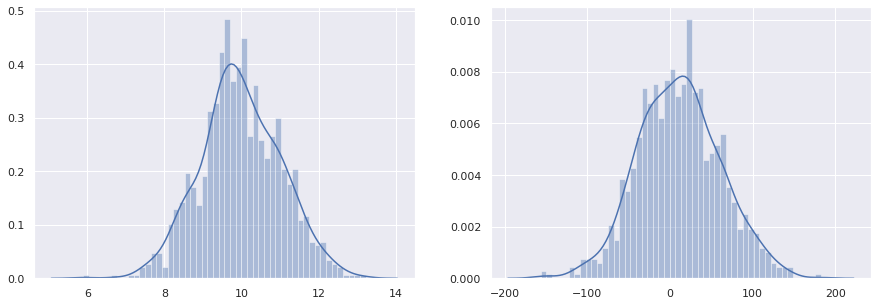

In [69]:
# your code here
from scipy.stats import norm

random = norm.rvs(loc=10, scale=1, size=1000)
random1 = norm.rvs(loc=10, scale=50, size=1000)

fig ,ax = plt.subplots(1,2,figsize=(15,5))

plt.sca(ax[0])
sns.distplot(random, hist=True, bins=50)

plt.sca(ax[1])
sns.distplot(random1, hist=True, bins=50)

How are the two distributions different?

*Just by checking the graph we could say both arrays are normally distributed*

In [70]:
print(np.std(random),np.std(random1))

1.0401080999539563 49.55961638806423


In [71]:
print("1st Graph: ",stats.describe(random),"median:",np.median(random),"\n"*3,"2nd Graph: ",stats.describe(random1),"median:",np.median(random))

1st Graph:  DescribeResult(nobs=1000, minmax=(5.882806107319538, 13.225025200262852), mean=9.97941224000656, variance=1.082907767357186, skewness=0.019339749601996213, kurtosis=0.03232409557219018) median: 9.930751013059822 


 2nd Graph:  DescribeResult(nobs=1000, minmax=(-156.4728776486923, 182.56797582057754), mean=11.1988333414062, variance=2458.6141907228075, skewness=0.06068217690804836, kurtosis=0.06075202696494175) median: 9.930751013059822


*Also if we implement some statistical fn, we can see the second graph is almost normally distributed, however the mean and median are not equal at all, so it means there must be some outliers that we could see rising the number of bins.*

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

In [72]:
# your code here
df = pd.read_csv("vehicles.csv")
print(df.shape)
df.head()

(35952, 15)


,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [77]:
plt.style.use('classic')
sns.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (10,4)

1. Fuel Barrels/Year

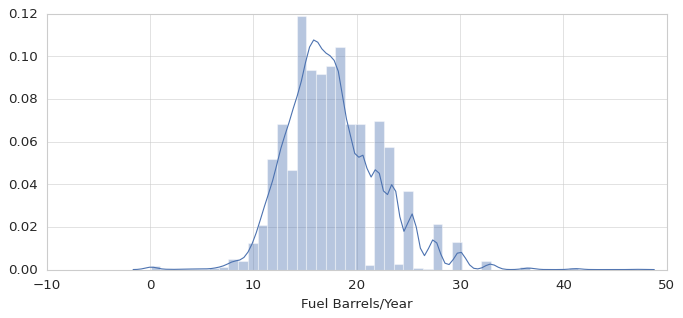

In [78]:
sns.distplot(df["Fuel Barrels/Year"], hist=True, bins=50)

In [82]:
df["Fuel Barrels/Year"].describe()

count    35952.000000
mean        17.609056
std          4.467283
min          0.060000
25%         14.699423
50%         17.347895
75%         20.600625
max         47.087143
Name: Fuel Barrels/Year, dtype: float64

In [85]:
df["Fuel Barrels/Year"].skew()

0.6382712089398946

2. CO2 Emission Grams/Mile 

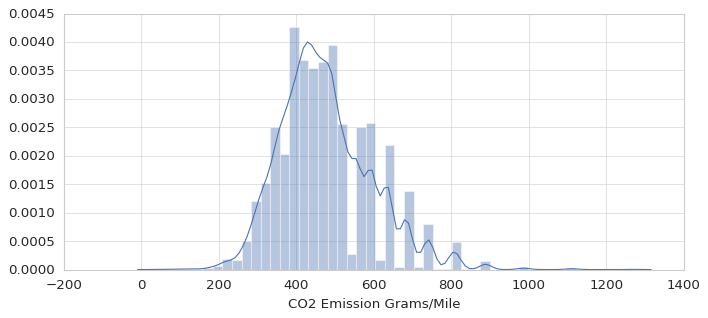

In [79]:
sns.distplot(df["CO2 Emission Grams/Mile"], hist=True, bins=50)

In [83]:
df["CO2 Emission Grams/Mile"].describe()

count    35952.000000
mean       475.316339
std        119.060773
min         37.000000
25%        395.000000
50%        467.736842
75%        555.437500
max       1269.571429
Name: CO2 Emission Grams/Mile, dtype: float64

In [86]:
df["CO2 Emission Grams/Mile"].skew()

0.7416918391899279

3. Combined MPG

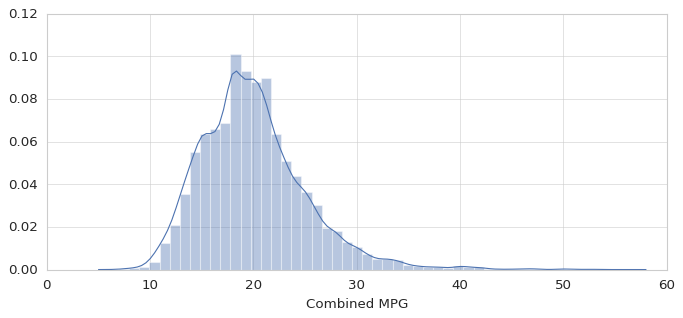

In [80]:
sns.distplot(df["Combined MPG"], hist=True, bins=50)

In [84]:
df["Combined MPG"].describe()

count    35952.000000
mean        19.929322
std          5.112409
min          7.000000
25%         16.000000
50%         19.000000
75%         23.000000
max         56.000000
Name: Combined MPG, dtype: float64

In [87]:
df["Combined MPG"].skew()

1.067772701547105

Which one(s) of the variables are nearly normally distributed? How do you know?

*By checking the grapsh I'd say:*

- Fuel Barrels/Year: is right skewed, but not that much, however the std must be high, as we can see jumps in between bins (ranges).

- CO2 Emission Grams/Mile: same conclussions as the 1st one.

- Combined MPG: this one is much more right skewed than the 2 previous, however its std will be smaller

*After implemeting some stat fns we can corroborate some of our previous view analysis. However, we were wrong with the std of the 1st and 3rd graphs, so better always make an stats recheck*

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 10 and 100.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

10.614636340618162 9.841761092035876


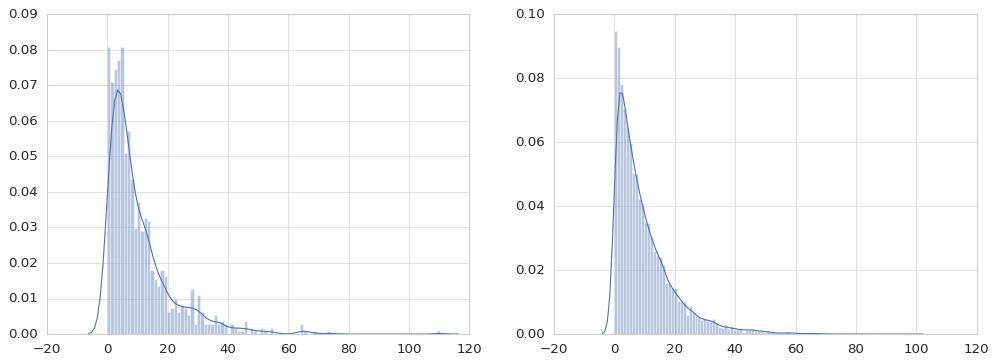

In [123]:
exp = np.random.exponential(scale=10, size=1000)
exp1 = np.random.exponential(scale=10, size=10000)
print(exp.mean(),exp1.mean())

fig ,ax = plt.subplots(1,2,figsize=(15,5))

plt.sca(ax[0])
sns.distplot(exp, hist=True, bins=100)

plt.sca(ax[1])
sns.distplot(exp1, hist=True, bins=100)

How are the two distributions different?

*The bigger the size the data is more normalized??*

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [124]:
# your answer here
# Hint: This is same as saying P(x<15)
from scipy.stats import expon

#we will use here the cdf as they are asking for an area under the var is

expon.cdf(15,10)

0.9932620530009145

What is the probability that the customer will spend more than 15 minutes

In [127]:
# your answer here
#here we will use the opposite, the pdf as they are asking for more than

expon.pdf(15,10)

0.006737946999085467